# Life Expectancy Prediction Project

I will use the **Life Expectancy dataset**, collected by the WHO and the United Nations, assembled and available at: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who. I will train a regression model to predict the life expectancy of a country based on the time series data of the same or different countries. The columns of the dataset are:

* **Life expectancy:** measured in years (target variable)
* **Country**
* **Year**
* **Status:** developing or developed country
* **Population:** population of the country
* **Adult mortality:** probability of dying between 15 and 60 years per 1000 population, for both sexes
* **Infant deaths:** number of infant deaths per 1000 population
* **Under-five deaths:** number of under-five deaths per 1000 population
* **GDP:** Gross Domestic Product per capita (in USD)
* **Percentage expenditure:** expenditure on health as a percentage of Gross Domestic Product per capita (%)
* **Total expenditure:** general government expenditure on health as a percentage of total government expenditure (%)
* **Income composition:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
* **Hepatitis B:** hepatitis B (HepB) immunization coverage among 1-year-olds (%)
* **Polio:** polio (Pol3) immunization coverage among 1-year-olds (%)
* **Diphteria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
* **Measles:** number of reported cases per 1000 population
* **HIV/AIDS:** deaths per 1000 live births HIV/AIDS (0-4 years)
* **Thinness 5-9:** prevalence of thinness among children and adolescents for age 5 to 9 (%)
* **Thinness 10-19:** prevalence of thinness among children and adolescents for age 10 to 19 (%)
* **BMI:** average Body Mass Index of entire population
* **Alcohol:** recorded per capita (15+) consumption (in litres of pure alcohol)
* **Schooling:** number of years of schooling

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
np.set_printoptions(legacy='1.25')

import plotly.io as pio
pio.templates.default = "simple_white"
pio.renderers.default = 'png'
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("life_expectancy_data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Inititial exploratory data analysis

In [3]:
# Formatting column names:
df.columns = df.columns.str.lower().str.strip()
df.columns = df.columns.str.replace(' ', '_').str.replace('__', '_').str.replace('/', '_')
df = df.rename(columns={'thinness_1-19_years': 'thinness_10-19_years'})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles                          2938 non-null   int64  
 10  bmi                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  polio               

The target variable `life_expectancy` has 10 missing values, so these rows will be removed:

In [5]:
df.dropna(subset=['life_expectancy'],how='any',inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
# Check if there are duplicated data:
df.duplicated().any()

False

In [7]:
cols_numerical = df.select_dtypes(include=['int64', 'float64']).columns
cols_categorical = df.select_dtypes(include=['object']).columns

In [8]:
# Value counts of categorical data:
for col in cols_categorical:
    print('Number of unique values of', col, ':', df[col].nunique())
    value_counts = df[col].value_counts()
    print(value_counts.value_counts())
    print()

Number of unique values of country : 183
count
16    183
Name: count, dtype: int64

Number of unique values of status : 2
count
2416    1
512     1
Name: count, dtype: int64



In [9]:
# Summary stats of numerical data:
df.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
year,2928.00,2007.50,4.61,2000.00,2003.75,2007.50,2011.25,2015.00
life_expectancy,2928.00,69.22,9.52,36.30,63.10,72.10,75.70,89.00
adult_mortality,2928.00,164.80,124.29,1.00,74.00,144.00,228.00,723.00
infant_deaths,2928.00,30.41,118.11,0.00,0.00,3.00,22.00,1800.00
alcohol,2735.00,4.61,4.05,0.01,0.91,3.77,7.71,17.87
percentage_expenditure,2928.00,740.32,1990.93,0.00,4.85,65.61,442.61,19479.91
hepatitis_b,2375.00,80.96,25.02,1.00,77.00,92.00,97.00,99.00
measles,2928.00,2427.86,11485.97,0.00,0.00,17.00,362.25,212183.00
bmi,2896.00,38.24,19.96,1.00,19.30,43.35,56.10,77.60
under-five_deaths,2928.00,42.18,160.70,0.00,0.00,4.00,28.00,2500.00


When inspecting the summary stats and histograms, several columns had odd or peculiar data:

* Each of the 16 years contains the same number of values, meaning the 10 rows with missing values of `life_expectancy` that were deleted earlier had data for 10 different countries than the ones left in `df`. This will not affect posterior analyses.
* `infant_deaths`, `under-five_deaths` and `measles` contains values >1000.
* `population` showed values as low as 34 and as high as 1.3 billion.
* `percentage_expenditure` does not cointain values between 0-1 or 0-100 (percentages).
* `income_composition_of_resources` contains many 0 values, which could represent missing values, as there is a gap of values >0 and <0.25.
* `bmi` shows values unrealistically low (<<<18.5) or high (>>>39.9), outside of the natural ranges of BMI.

We'll have a deeper look into some of these columns:

### Infant deaths, under-five deaths and measles

Such high values (>1000) could indicate cases were not normalized per 1000 population.

In [10]:
(df.loc[:, 'infant_deaths'] > 1000).sum(), (df.loc[:, 'under-five_deaths'] > 1000).sum(), (df.loc[:, 'measles'] > 1000).sum()

(13, 16, 525)

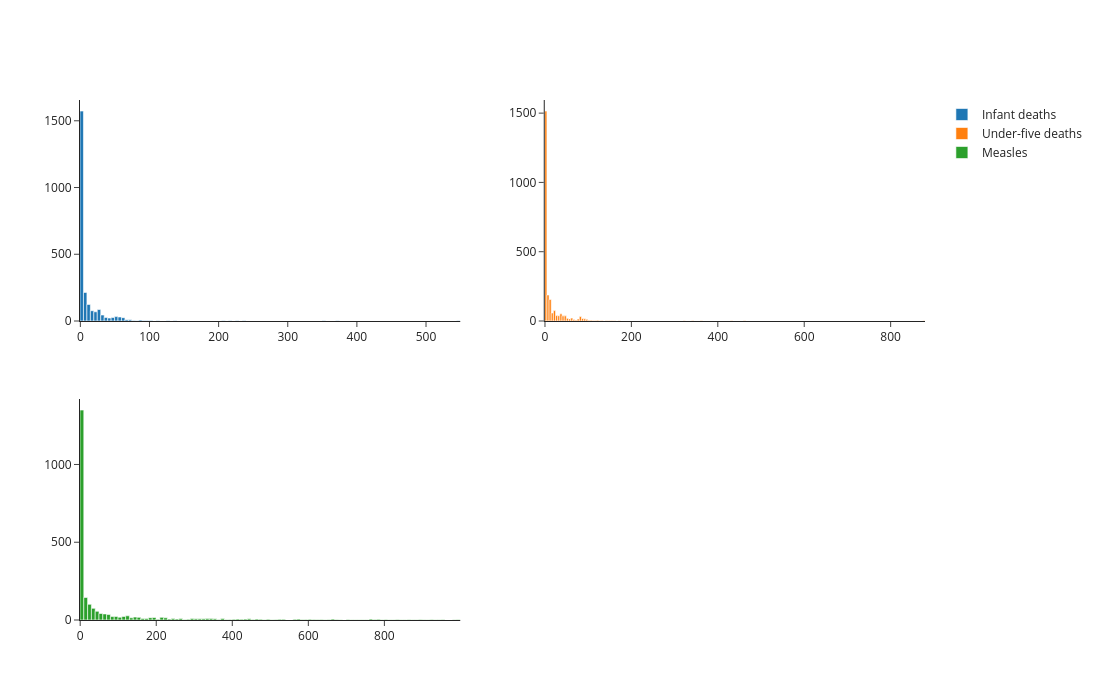

In [11]:
df_inf_deaths_measles_less1000 = df.loc[(df.loc[:, 'infant_deaths'] < 1000) & 
                                        (df.loc[:, 'under-five_deaths'] < 1000) & 
                                        (df.loc[:, 'measles'] < 1000)]

fig = make_subplots(rows=2, cols=2)

fig.add_trace(go.Histogram(x=df_inf_deaths_measles_less1000['infant_deaths'], name='Infant deaths'),
             row=1, col=1)
fig.add_trace(go.Histogram(x=df_inf_deaths_measles_less1000['under-five_deaths'], name='Under-five deaths'),
             row=1, col=2)
fig.add_trace(go.Histogram(x=df_inf_deaths_measles_less1000['measles'], nbinsx=100, name='Measles'),
             row=2, col=1)

fig.update_layout(height=700, width=1100)
fig.show()

In the case of `infant_deaths` and `under-five_deaths`, only 13 and 16 examples have values >1000, indicating data might actually be normalized by population. The histograms for both columns look okay, with the higher-frequency values being around 0-4. However, I performed a quick search at https://childmortality.org/ for a variety of countries and found that values for both columns mostly did not match the values in the database. In case the values in this dataset are not correct, I will replace them by the UN IGME estimates for infant mortality, under-five mortality and neonatal mortality rates. The dataset is downloaded from https://childmortality.org/all-cause-mortality/data/download?indicator=MRY0T4&refArea=AFG as `UNICEF-CME_DF_2021_WQ-1.0-download.csv`.

In [12]:
df_children = pd.read_csv('UNICEF-CME_DF_2021_WQ-1.0-download.csv',
                          usecols=['Geographic area', 'Indicator', 'Series Name', 'TIME_PERIOD', 'OBS_VALUE'])

# Renaming columns to match the columns of df:
df_children = df_children.rename(columns={'Geographic area': 'country', 'Series Name': 'series_name', 'TIME_PERIOD': 'year'})
# Subsetting only UN IGME estimate values
df_children = df_children.loc[df_children.loc[:, 'series_name'] == 'UN IGME estimate']
df_children.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39675 entries, 15 to 91608
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      39675 non-null  object 
 1   Indicator    39675 non-null  object 
 2   series_name  39675 non-null  object 
 3   year         39675 non-null  object 
 4   OBS_VALUE    39675 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [13]:
# Subsetting only rows of years 2000-2015:
df_children['year'] = df_children['year'].str.replace('-06', '')
years = list(range(2000, 2016))
df_children['year'] = df_children['year'].astype(int)
df_children = df_children.loc[df_children['year'].isin(years)]

In [14]:
# Table pivot to obtain the indicators as columns:
df_children_pivot = df_children.pivot_table(index=['country', 'year'], 
                                   columns='Indicator', 
                                   values='OBS_VALUE').reset_index()
df_children_pivot.columns = ['country', 'year', 'infant_mortality_rate', 'neonatal_mortality_rate', 'under-five_mortality_rate']
df_children_pivot

,country,year,infant_mortality_rate,neonatal_mortality_rate,under-five_mortality_rate
0,Afghanistan,2000,92.010106,62.693351,131.639217
1,Afghanistan,2001,89.322969,61.482939,127.371223
2,Afghanistan,2002,86.571870,60.209191,123.022248
3,Afghanistan,2003,83.715381,58.884175,118.508077
4,Afghanistan,2004,80.885684,57.472937,114.038248
...,...,...,...,...,...
3755,Zimbabwe,2011,51.067659,31.087776,79.986703
3756,Zimbabwe,2012,46.802387,30.089620,71.744139
3757,Zimbabwe,2013,44.955179,29.178977,65.881488
3758,Zimbabwe,2014,43.024039,28.478751,62.290730


In [15]:
# Number of matching countries between both dfs:
unique_countries_df = df['country'].unique()
unique_countries_df_children_pivot = df_children_pivot['country'].unique()
len(np.intersect1d(unique_countries_df, unique_countries_df_children_pivot))

179

In [16]:
# Countries unique to df:
np.setdiff1d(unique_countries_df, unique_countries_df_children_pivot)

array(['Netherlands', 'Swaziland',
       'The former Yugoslav republic of Macedonia', 'Turkey'],
      dtype=object)

Searching these countries in childmortality.org, I see the names are recorded as: Netherlands (Kingdom of the), Eswatini (former Swaziland), North Macedonia and The Republic of Türkiye.

In [17]:
df_children_pivot['country'] = df_children_pivot['country'].str.replace('Netherlands (Kingdom of the)', 'Netherlands')
df_children_pivot['country'] = df_children_pivot['country'].str.replace('Eswatini', 'Swaziland')
df_children_pivot['country'] = df_children_pivot['country'].str.replace('North Macedonia', 'The former Yugoslav republic of Macedonia')
df_children_pivot['country'] = df_children_pivot['country'].str.replace('The Republic of Türkiye', 'Turkey')

In [18]:
df_merged = df.merge(df_children_pivot, on=['country', 'year'])
df_merged['country'].nunique()

183

In the case of `measles`, 525 records show values >1000. In the case values were not normalized by 1000 population, one could expect to see min values substantially greater than zero. For reference, in a developed country like Spain, there were 0.3 reported cases of measles per 100,000 population in 2014 (source: https://www.sanidad.gob.es/). However, the majority of records took values between 0-9, making this column unreliable. Thus, I will leave out this column for training.

### Population

There are many examples with low population values, being 34 the minimum.

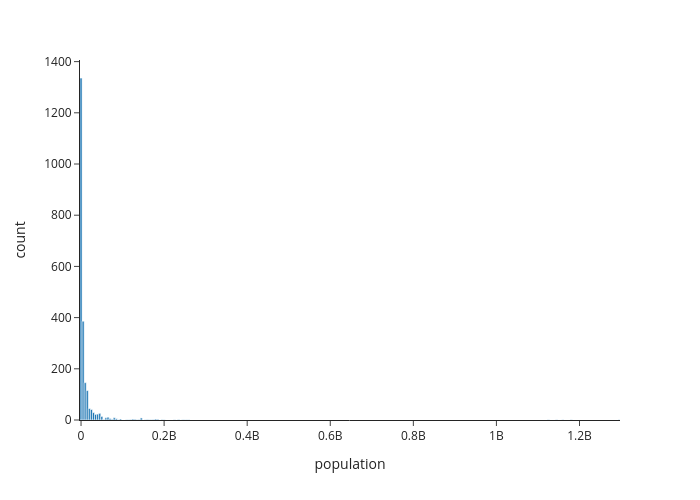

In [19]:
fig = px.histogram(df, x='population', nbins=500)
fig.show()

I search online the top smallest countries in the world and looked for their population values on the dataset (source: https://bestdiplomats.org/countries-with-lowest-population/):

In [20]:
smallest_countries = ['Vatican City', 'Tuvalu', 'Nauru', 'Palau', 'San Marino', 'Monaco', 'Liechtenstein', 
                      'Saint Kitts and Nevis', 'Dominica', 'Andorra', 'Tonga', 'Seychelles', 'Antigua and Barbuda', 
                      'Micronesia', 'Saint Vincent and the Grenadines']
df_smallest_countries = df[df['country'].isin(smallest_countries)]
df_smallest_countries['population'].describe()

count       32.000000
mean     44066.812500
std      40782.577549
min        135.000000
25%       8941.000000
50%      15555.000000
75%      87041.500000
max      99789.000000
Name: population, dtype: float64

In [21]:
df_smallest_countries.loc[df_smallest_countries.loc[:, 'population'] == 135]

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_10-19_years,thinness_5-9_years,income_composition_of_resources,schooling
2631,Tonga,2008,Developing,72.6,145.0,0,1.1,569.625504,84.0,0,...,88.0,5.13,86.0,0.1,3392.64743,135.0,0.1,0.1,0.698,14.5


In [22]:
((df.loc[:, 'population'] >= 34) & (df.loc[:, 'population'] <= 135)).sum()

6

The smallest country according to the dataset was Tonga, which is not among the smallest countries list (and actually amounted for a total 107,000 in 2014, source: Google). Furthermore, 5 additional examples in the dataset had population values <135. Therefore, the `population` column is highly unreliable and will be excluded for training.

### Percentage of expenditure

The column does not cointain percentages, thus it may not be corrected by GDP. However, the most frequent values are close to zero, which is most probably impossible:

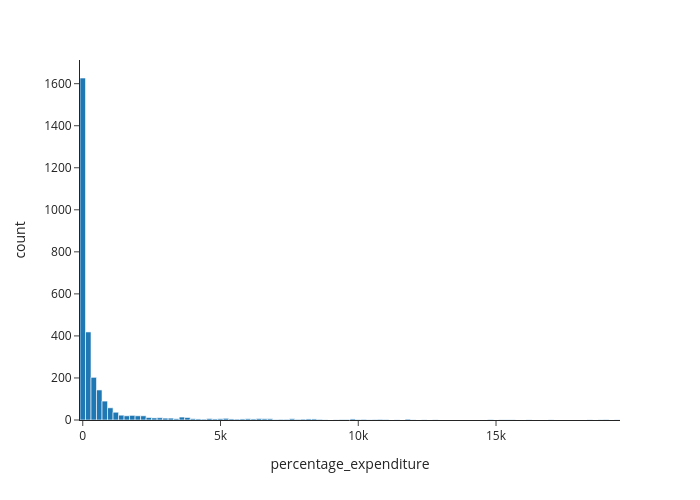

In [23]:
fig = px.histogram(df, x='percentage_expenditure')
fig.show()

In [24]:
(df.loc[:, 'percentage_expenditure'] > 100).sum() / df.shape[0] * 100

44.43306010928962

Moreover, >44% of examples have values >100, indicating this column is not reliable either. However, column `total_expenditure` seems to contain plausible values (percentages) and provides similar information as `percentage_expenditure`. Thus, training will be performed only with `total_expenditure`.

### BMI

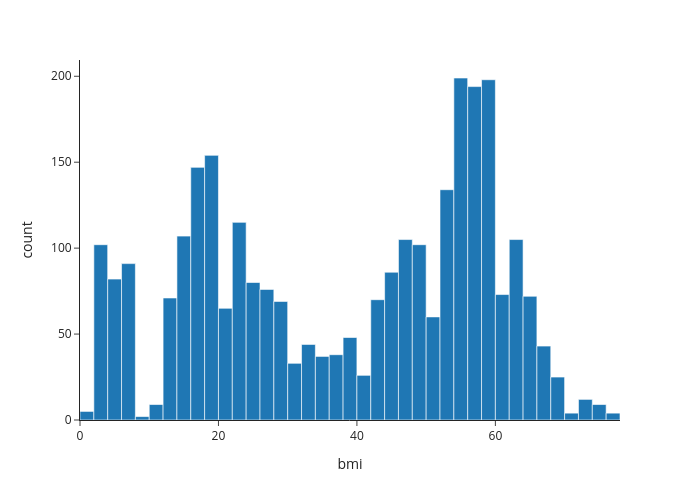

In [25]:
fig = px.histogram(df, x='bmi')
fig.show()

In [26]:
df_low_bmi = df.loc[df.loc[:, 'bmi'] < 18]
df_high_bmi = df.loc[df.loc[:, 'bmi'] > 40]
df_low_bmi['status'].value_counts(), df_high_bmi['status'].value_counts()

(status
 Developing    565
 Developed      51
 Name: count, dtype: int64,
 status
 Developing    1089
 Developed      432
 Name: count, dtype: int64)

Many developed countries (n=51) would have average BMI considered as underweight. On the other hand, many developing countries (n=1096) would have average BMI in the range of morbid obesity. This values are obviously not realistic, so I will drop them for further analysis.

# Initial correlation matrix

First, I will subset the columns I decided to keep after the initial EDA. Notice that the `country` column is no longer included, since I will train a general model to predict the life expectancy of a given country.

In [27]:
cols_to_keep = ['year', 'status', 'life_expectancy',
                'adult_mortality', 'infant_mortality_rate', 'under-five_mortality_rate', 'neonatal_mortality_rate',
                'gdp', 'total_expenditure', 
                'hepatitis_b', 'polio', 'diphtheria', 'hiv_aids', 'thinness_5-9_years', 'thinness_10-19_years',
                'alcohol', 'schooling']
df_keep = df_merged[cols_to_keep]
df_keep

,year,status,life_expectancy,adult_mortality,infant_mortality_rate,under-five_mortality_rate,neonatal_mortality_rate,gdp,total_expenditure,hepatitis_b,polio,diphtheria,hiv_aids,thinness_5-9_years,thinness_10-19_years,alcohol,schooling
0,2015,Developing,65.0,263.0,54.587315,72.676981,42.363969,584.259210,8.16,65.0,6.0,65.0,0.1,17.3,17.2,0.01,10.1
1,2014,Developing,59.9,271.0,56.242054,75.282730,43.507852,612.696514,8.18,62.0,58.0,62.0,0.1,17.5,17.5,0.01,10.0
2,2013,Developing,59.9,268.0,58.069948,78.159978,44.701171,631.744976,8.13,64.0,62.0,64.0,0.1,17.7,17.7,0.01,9.9
3,2012,Developing,59.5,272.0,60.091018,81.340676,45.988517,669.959000,8.52,67.0,67.0,67.0,0.1,18.0,17.9,0.01,9.8
4,2011,Developing,59.2,275.0,62.257073,84.738789,47.322593,63.537231,7.87,68.0,68.0,68.0,0.1,18.2,18.2,0.01,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2004,Developing,44.3,723.0,51.631593,90.473104,30.800916,454.366654,7.13,68.0,67.0,65.0,33.6,9.4,9.4,4.36,9.2
2924,2003,Developing,44.5,715.0,50.527621,90.266143,29.860859,453.351155,6.52,7.0,7.0,68.0,36.7,9.9,9.8,4.06,9.5
2925,2002,Developing,44.8,73.0,50.527382,91.225726,28.738312,57.348340,6.53,73.0,73.0,71.0,39.8,1.3,1.2,4.43,10.0
2926,2001,Developing,45.3,686.0,50.670455,92.528774,27.540166,548.587312,6.16,76.0,76.0,75.0,42.1,1.7,1.6,1.72,9.8


In [28]:
cols_numerical = df_keep.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df_keep.loc[:, cols_numerical]
corr_matrix = df_numerical.corr()

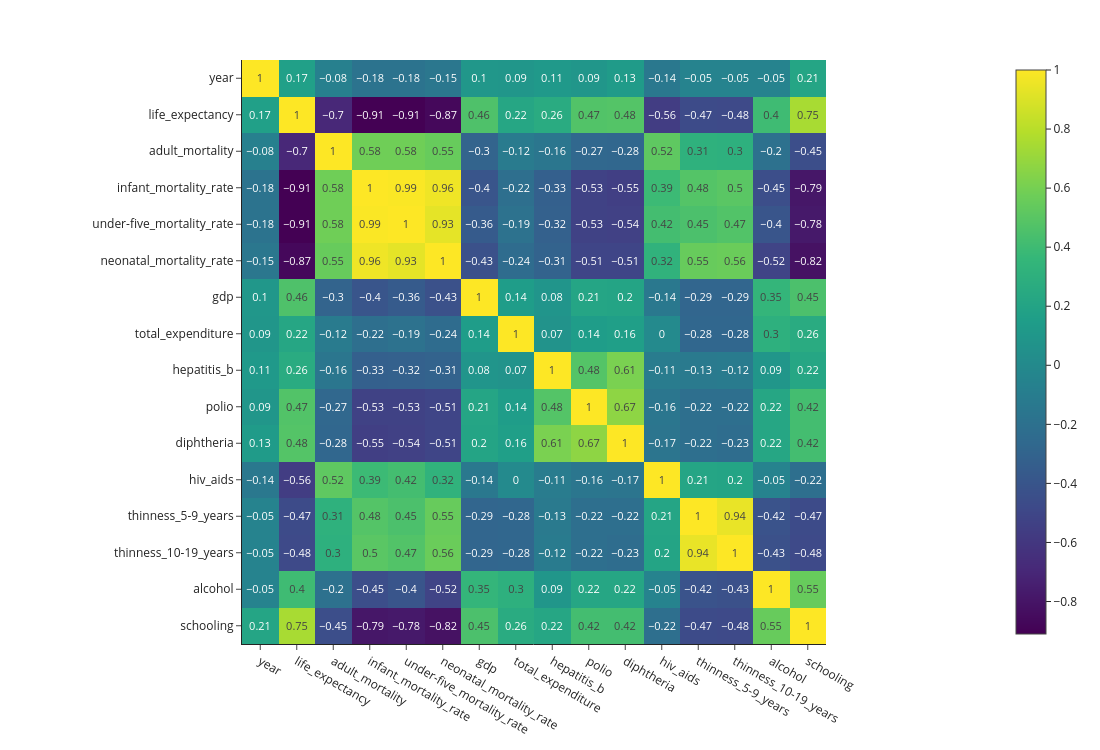

In [29]:
fig = px.imshow(corr_matrix.round(2), text_auto=True)
fig.update_layout(height=750, width=1100)
fig.show()

Since the three features `infant_mortality_rate`, `under-five_mortality_rate` and `neonatal_mortality_rate` are highly correlated with `life_expectancy` and with each other, I will only keep one feature: `infant_mortality_rate`, as it is more general.

In [30]:
df_keep = df_keep.drop(columns=['under-five_mortality_rate', 'neonatal_mortality_rate'])

# Exploring missing values

In [31]:
df_keep.isnull().sum()

year                       0
status                     0
life_expectancy            0
adult_mortality            0
infant_mortality_rate      0
gdp                      443
total_expenditure        226
hepatitis_b              553
polio                     19
diphtheria                19
hiv_aids                   0
thinness_5-9_years        32
thinness_10-19_years      32
alcohol                  193
schooling                160
dtype: int64

Let's investigate the distribution of missing values further:

<Axes: >

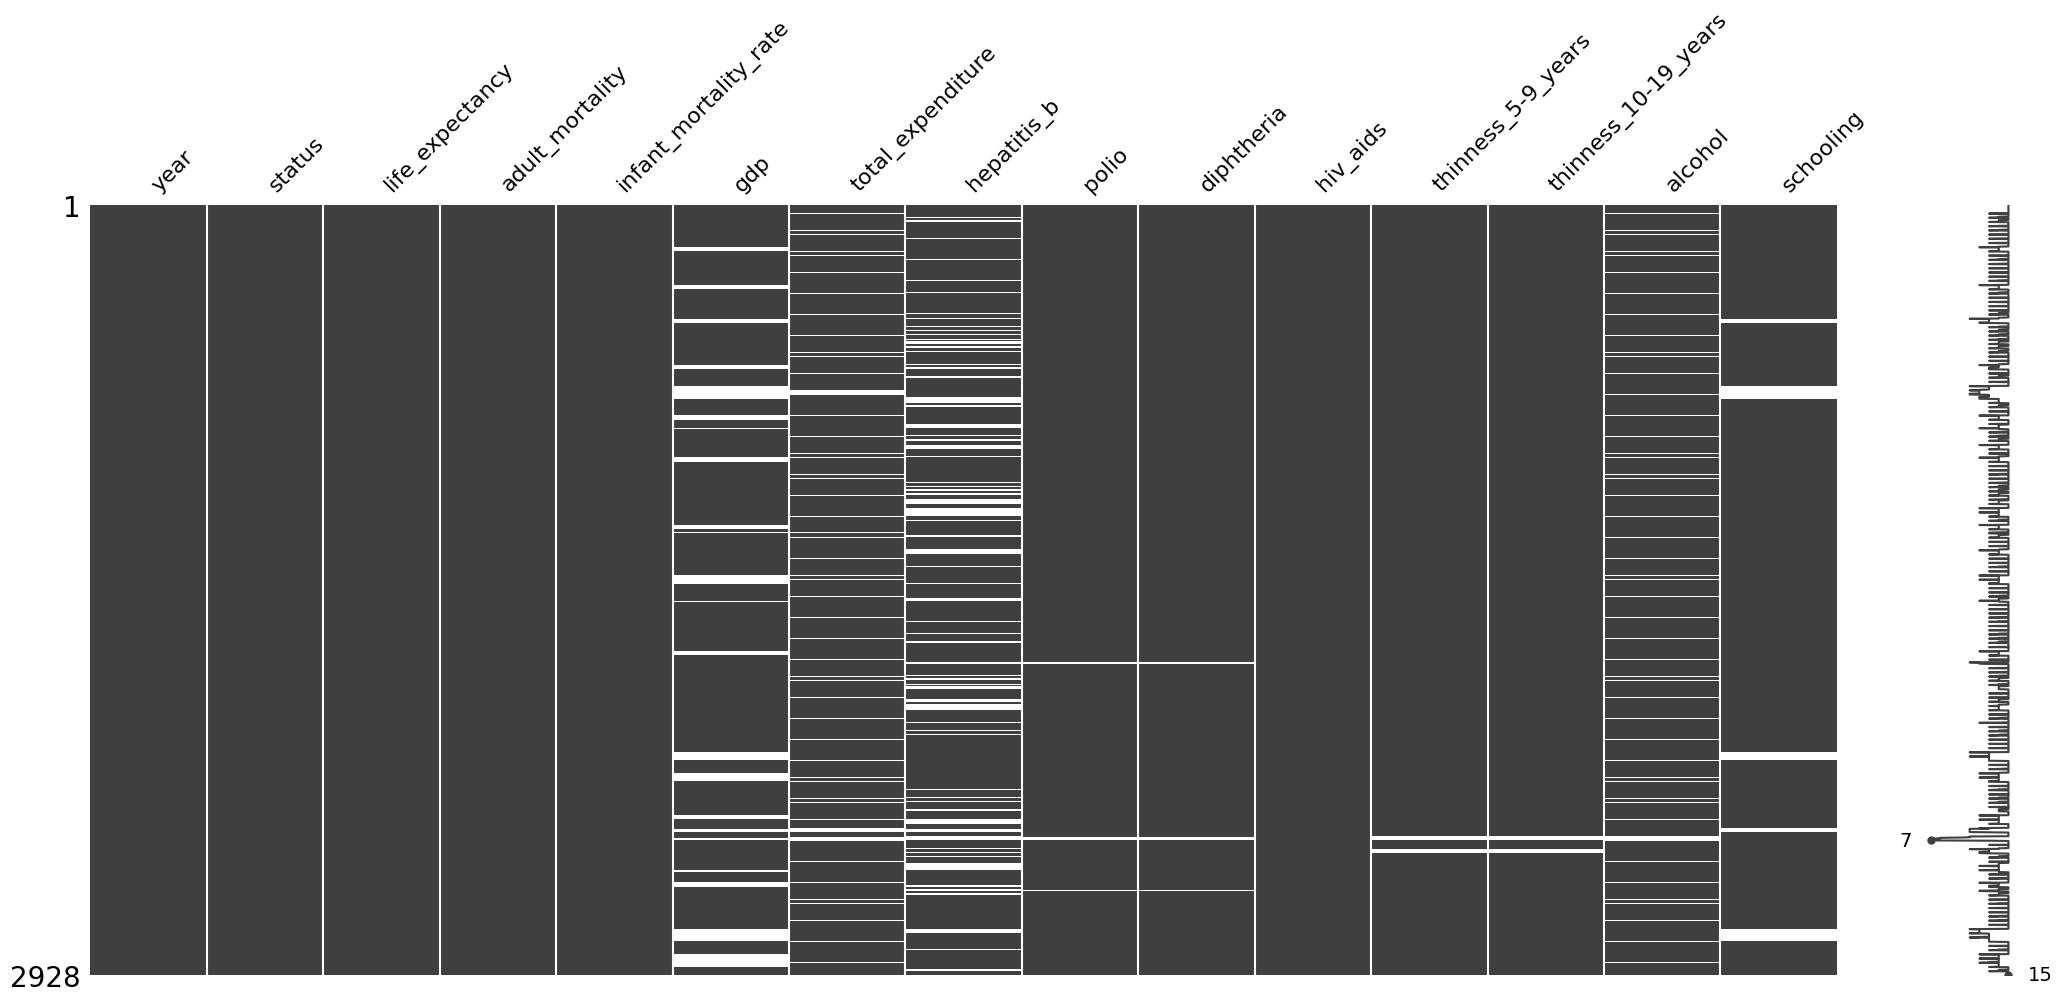

In [32]:
msno.matrix(df_keep)

<Axes: >

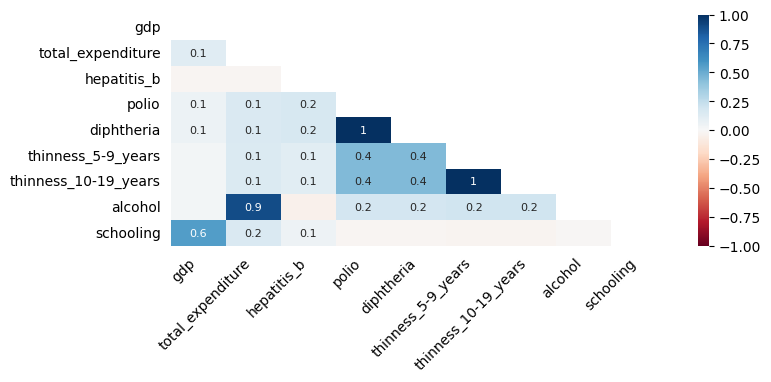

In [33]:
msno.heatmap(df_keep, figsize=(8,3), fontsize=10)

<Axes: >

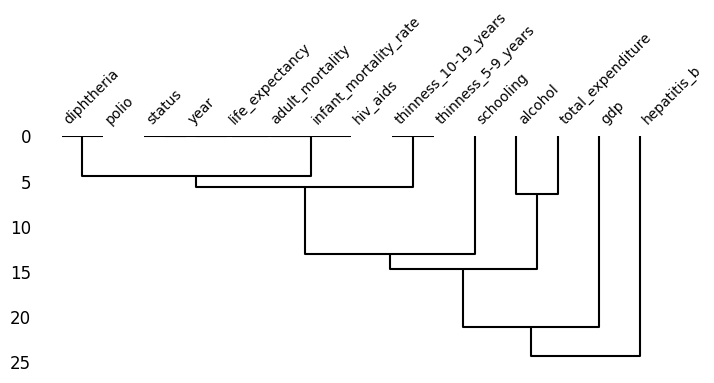

In [34]:
msno.dendrogram(df_keep, figsize=(8,3), fontsize=10)

Missingness of features `diphteria`-`polio`, `thinness_5-9_years`-`thinness_10-19_years` and `alcohol`-`total_expenditure` are highly correlated pairwise (>0.9), and thus seem to be missing at random (MAR). The missingness of `schooling` and `gdp` could be missing not at random (MNAR) due to the distribution of NaNs, although they seem to be weakly correlated with eachother (0.6), indicating they could be MAR. For simplicity, and to avoid dropping the `schooling` and `gdp` features, I'm going to assume the values of all these columns are MAR and proceed with an imputation technique.

# Dataset splitting and one-hot encoding

Since I'm working with a time series dataset, I will extract the rows of the latest 3 years (2013-2015, ~20% of the available 16 years of data) for the test dataset. The remaining years (2000-2012) will be used as the train+validation dataset with cross-validation.

In [35]:
df_train = df_keep[df_keep.loc[:, 'year'] < 2013]
df_train.reset_index(drop=True, inplace=True)

df_test = df_keep[df_keep.loc[:, 'year'] >= 2013]
df_test.reset_index(drop=True, inplace=True)

df_test.shape, df_train.shape

((549, 15), (2379, 15))

One-hot encoding of the `status`feature:

In [36]:
# Fit OneHotEncoder on the train dataset:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(df_train['status'].to_numpy().reshape(-1, 1))

# One-hot encode the train dataset:
status_encoded_train = encoder.transform(df_train['status'].to_numpy().reshape(-1, 1))
encoded_df_train = pd.DataFrame(status_encoded_train, columns=encoder.get_feature_names_out(['status']))
df_train = pd.concat([df_train.drop('status', axis=1), encoded_df_train], axis=1)

# One-hot encode the test dataset:
status_encoded_test = encoder.transform(df_test['status'].to_numpy().reshape(-1, 1))
encoded_df_test = pd.DataFrame(status_encoded_test, columns=encoder.get_feature_names_out(['status']))
df_test = pd.concat([df_test.drop('status', axis=1), encoded_df_test], axis=1)

In [37]:
df_train

,year,life_expectancy,adult_mortality,infant_mortality_rate,gdp,total_expenditure,hepatitis_b,polio,diphtheria,hiv_aids,thinness_5-9_years,thinness_10-19_years,alcohol,schooling,status_Developed,status_Developing
0,2012,59.5,272.0,60.091018,669.959000,8.52,67.0,67.0,67.0,0.1,18.0,17.9,0.01,9.8,0.0,1.0
1,2011,59.2,275.0,62.257073,63.537231,7.87,68.0,68.0,68.0,0.1,18.2,18.2,0.01,9.5,0.0,1.0
2,2010,58.8,279.0,64.584063,553.328940,9.20,66.0,66.0,66.0,0.1,18.4,18.4,0.01,9.2,0.0,1.0
3,2009,58.6,281.0,67.047378,445.893298,9.42,63.0,63.0,63.0,0.1,18.7,18.6,0.01,8.9,0.0,1.0
4,2008,58.1,287.0,69.626684,373.361116,8.33,64.0,64.0,64.0,0.1,18.9,18.8,0.03,8.7,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2004,44.3,723.0,51.631593,454.366654,7.13,68.0,67.0,65.0,33.6,9.4,9.4,4.36,9.2,0.0,1.0
2375,2003,44.5,715.0,50.527621,453.351155,6.52,7.0,7.0,68.0,36.7,9.9,9.8,4.06,9.5,0.0,1.0
2376,2002,44.8,73.0,50.527382,57.348340,6.53,73.0,73.0,71.0,39.8,1.3,1.2,4.43,10.0,0.0,1.0
2377,2001,45.3,686.0,50.670455,548.587312,6.16,76.0,76.0,75.0,42.1,1.7,1.6,1.72,9.8,0.0,1.0


# Handling missing values

For data imputation, I'm going to use the MICE (multivariate imputation by chained equations) method, due to correlations between columns with missing values.

In [38]:
# Fit MICE on the train dataset:
imp = IterativeImputer(max_iter=10, random_state=4)
imp.fit(df_train)

# Data imputation for the train dataset:
imp_df_train = imp.transform(df_train)
df_train.loc[:, :] = imp_df_train

# Data imputation for the test dataset:
imp_df_test = imp.transform(df_test)
df_test.loc[:, :] = imp_df_test

In [39]:
df_train.isnull().sum()

year                     0
life_expectancy          0
adult_mortality          0
infant_mortality_rate    0
gdp                      0
total_expenditure        0
hepatitis_b              0
polio                    0
diphtheria               0
hiv_aids                 0
thinness_5-9_years       0
thinness_10-19_years     0
alcohol                  0
schooling                0
status_Developed         0
status_Developing        0
dtype: int64

In [40]:
df_test.isnull().sum()

year                     0
life_expectancy          0
adult_mortality          0
infant_mortality_rate    0
gdp                      0
total_expenditure        0
hepatitis_b              0
polio                    0
diphtheria               0
hiv_aids                 0
thinness_5-9_years       0
thinness_10-19_years     0
alcohol                  0
schooling                0
status_Developed         0
status_Developing        0
dtype: int64

* Data transformation & feature engineering -- check if transform before or after feature engineering
* Cross-validation